In [118]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pandas as pd
import numpy as np
import tensorflow as tf

import keras
from keras.preprocessing import image

# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [119]:
from keras.preprocessing.image import ImageDataGenerator

image_size = (256,256)
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, 6, 6, input_shape = (256, 256, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 40, activation = 'relu'))
classifier.add(Dense(output_dim = 74, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (6, 6), input_shape=(256, 256,..., activation="relu")`
  
C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40)`
C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=74)`


In [120]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets/Training',
                                                 target_size = image_size,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = image_size,
                                            batch_size = 32,
                                            class_mode = 'categorical')

classifier.fit_generator(training_set,
                         samples_per_epoch = 100,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 50)

Found 2810 images belonging to 74 classes.
Found 2558 images belonging to 74 classes.


C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=3, epochs=5, validation_steps=50)`


Epoch 1/5
3/3 [==============================] - 43s 14s/step - loss: 0.9679 - acc: 0.6719 - val_loss: 0.5259 - val_acc: 0.7474
Epoch 2/5
3/3 [==============================] - 38s 13s/step - loss: 0.5321 - acc: 0.7439 - val_loss: 0.4772 - val_acc: 0.7751
Epoch 3/5
3/3 [==============================] - 39s 13s/step - loss: 0.4750 - acc: 0.7720 - val_loss: 0.4535 - val_acc: 0.7926
Epoch 4/5
3/3 [==============================] - 40s 13s/step - loss: 0.4388 - acc: 0.7786 - val_loss: 0.4118 - val_acc: 0.8172
Epoch 5/5
3/3 [==============================] - 40s 13s/step - loss: 0.4018 - acc: 0.8226 - val_loss: 0.3746 - val_acc: 0.8296


In [121]:
score = classifier.evaluate_generator(test_set, verbose=0, steps=6)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3761797199646632
Test accuracy: 0.8284064730008444


In [122]:
# Refactor above steps into reusable function
def predict(image_path):
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    class_index_to_class = { v: k for k, v in training_set.class_indices.items() }
    index_max = np.argmax(classifier.predict(x)[0])
    prediction = class_index_to_class[index_max]
    plt.imshow(img)
    print('Predicted: ', prediction)
    # print(classifier.predict(x))

Predicted:  Pepper


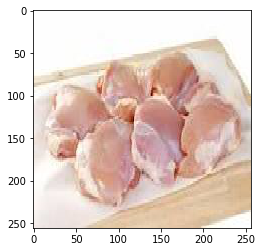

In [123]:
image_path = os.path.join("download1.jpg")
predict(image_path)

Predicted:  Pepper


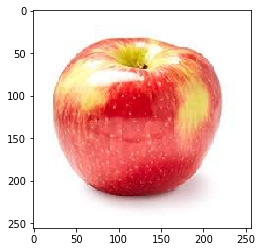

In [124]:
image_path = os.path.join("download2.jpg")
predict(image_path)

Predicted:  Pepper


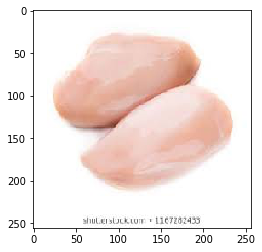

In [125]:
image_path = os.path.join("images2.jpg")
predict(image_path)

In [126]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 251, 251, 64)      6976      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 123, 123, 32)      18464     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 119072)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 40)                4762920   
_________________________________________________________________
dense_21 (Dense)             (None, 74)                3034      
Total para

In [ ]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(test_set, classifier.predict(test_set)).ravel()
print(f"tn:{tn:3d}    tn:{fp:3d}")
print(f"tn:{fn:3d}    tn:{tp:3d}")

In [ ]:
pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)), 
             columns=('actual_not','actual_success'), index=('predicted_not','predicted_success'))

In [ ]:
# classifier.predict_generator(training_set,steps=3)
# classifier.predict_classes(training_set)
len(training_set)
# 
# for (train_image, _) in training_set:
#     classifier.predict_classes(train_image)
# "reverse" from predicted class to the predicted *label*
# Get the actual value *label* for each row

# training_set[0]

In [74]:
# Save the model
classifier.save("food_trained_cnn_v2.h5")

In [75]:
# Load the model
from tensorflow.keras.models import load_model
saved_classifier = load_model("food_trained_cnn_v2.h5")

In [76]:
# Refactor above steps into reusable function
def predict_v2(image_path):
    image_size = (128,128)
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    class_index_to_class = { v: k for k, v in training_set.class_indices.items() }
    index_max = np.argmax(saved_classifier.predict(x)[0])
    prediction = class_index_to_class[index_max]
    plt.imshow(img)
    print('Predicted: ', prediction)

Predicted:  Apple


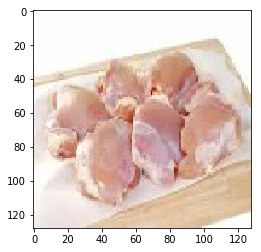

In [77]:
import os
image_path = os.path.join("download.jpg")
predict_v2(image_path)

In [78]:
# test_generator = ImageDataGenerator()
# test_data_generator = test_generator.flow_from_directory(
#     test_data_path, # Put your path here
#      target_size=(img_width, img_height),
#     batch_size=32,
#     shuffle=False)
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [79]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   
print(len(class_labels))
print(len(set(true_classes)))
print(len(set(predicted_classes)))

74
74
16


In [80]:
nums = list(set(true_classes))

In [81]:
class_index_to_class = { v: k for k, v in training_set.class_indices.items() }
for num in nums:
    print(class_index_to_class[num])

Apple
Asparagus
Avocado
Banana
Brown Sugar
Cabbage
Carrots
Chicken Breast
Chicken Leg
Chicken Thigh
Chocolate
Cod
Cucumber
Eggplant
Flour
Garlic
Ginger
Ground Beef
Juice
Kiwi
Leek
Lemon
Lime
Mango
Melon
Mushroom
Nectarine
Oat-Milk
Oatghurt
Onion
Orange
Papaya
Passion-Fruit
Peach
Pear
Pepper
Pineapple
Plum
Pomegranate
Potato
Red-Beet
Red-Grapefruit
Rice
Rice Noodles
Salmon
Satsumas
Sour-Cream
Sour-Milk
Soy-Milk
Soyghurt
Steak
Talapia
Tomato
Tuna
Yoghurt
Zucchini
black_beans
butter
cheddar_cheese
coconut_milk
cottage_cheese
egg
kidney_bean
lentils
milk
mozzarella_cheese
noodles
pinto_beans
refried_beans
sour_cream
swiss_cheese
tofu
white_beans
yogurt


In [82]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                   precision    recall  f1-score   support

            Apple       0.11      0.67      0.19       276
        Asparagus       0.00      0.00      0.00        14
          Avocado       0.00      0.00      0.00        40
           Banana       0.00      0.00      0.00        44
      Brown Sugar       0.00      0.00      0.00         1
          Cabbage       0.00      0.00      0.00        19
          Carrots       0.00      0.00      0.00        43
   Chicken Breast       0.00      0.00      0.00         1
      Chicken Leg       0.00      0.00      0.00         1
    Chicken Thigh       0.00      0.00      0.00         1
        Chocolate       0.00      0.00      0.00         2
              Cod       0.00      0.00      0.00         1
         Cucumber       0.00      0.00      0.00        27
         Eggplant       0.00      0.00      0.00        22
            Flour       0.00      0.00      0.00         1
           Garlic       0.00      0.00      0.00       

C:\Users\carri\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [83]:
import sklearn.metrics as metrics

y_pred_ohe = classifier.predict(test_set)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
y_true_labels = test_set.classes
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  # shape=(12, 12)

AttributeError: 'DirectoryIterator' object has no attribute 'ndim'

In [26]:
print(y_pred_ohe)

[[0.02334095 0.00675702 0.02626967 ... 0.00107417 0.00377243 0.0043847 ]
 [0.23943779 0.00266455 0.00638898 ... 0.00072044 0.00122039 0.00229143]
 [0.03357112 0.00981789 0.02704601 ... 0.00119865 0.00375133 0.00474569]
 ...
 [0.1128812  0.00494323 0.02448733 ... 0.00182735 0.00310628 0.00261418]
 [0.2512541  0.0017624  0.00589322 ... 0.00053292 0.0007602  0.00188257]
 [0.06861151 0.00713087 0.02825164 ... 0.00136094 0.00298801 0.00421891]]


In [27]:
print(y_pred_labels)

[55  0 19 ...  0  0 19]


In [40]:
test_set.reset()
pred=classifier.predict(test_set,
steps=test_set.n//test_set.batch_size,
verbose=1)

AttributeError: 'DirectoryIterator' object has no attribute 'ndim'

In [34]:
pred_bool = (pred >0.5)
predictions=[]
labels = training_set.class_indices
labels = dict((v,k) for k,v in labels.items())
for row in pred_bool:
    l=[]
    for index,cls in enumerate(row):
        if cls:
            l.append(label[index])
    predictions.append(",".join(l))
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

NameError: name 'pred_bool' is not defined